# 과제: 자전거 대여 수요 예측 경진대회 모델 성능 개선

- [자전거 대여 수요 예측 경진대회 링크](https://www.kaggle.com/c/bike-sharing-demand)

- [모델링 코드 참고 링크](https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile)

In [1]:
print("김가람", "202001723")

김가람 202001723


수강생분의 이름과 학번을 입력해주세요.

print("김가람", "202001723")

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# 데이터 경로
data_path = '/kaggle/input/bike-sharing-demand/'

train = pd.read_csv(data_path + 'train.csv') # 훈련 데이터
test = pd.read_csv(data_path + 'test.csv')   # 테스트 데이터
submission = pd.read_csv(data_path + 'sampleSubmission.csv') # 제출 샘플 데이터

## 피처 엔지니어링

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


train.info()

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [8]:
train.head()
#3. 피처 엔지니어링 이후 data 피처 정보는 year, moth, day에서 중복적으로 나오기에 date피처 제거
#4. 개우러을 3개씩 묶으면 계절이기에 month 피처는 제거

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


시각화 해보기

In [9]:
#시각화를 위한 라이브러리 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


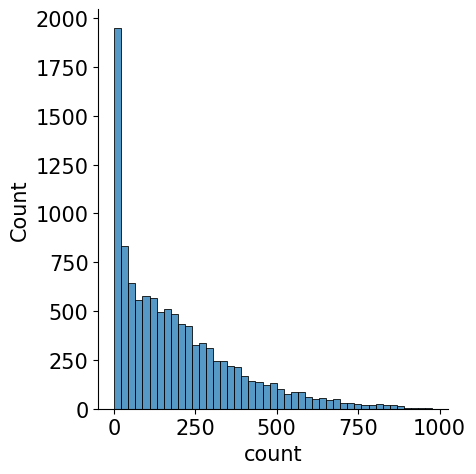

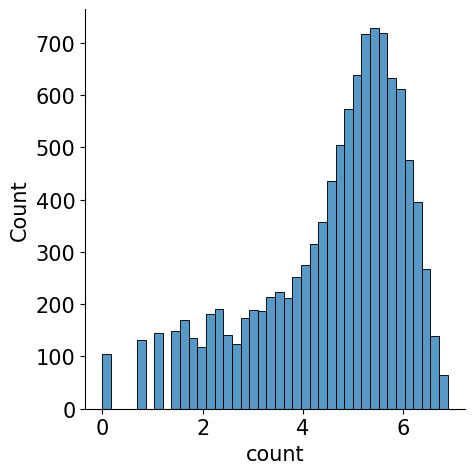

In [10]:
#분포도 
mpl.rc('font', size=15)      # 폰트 크기를 15로 설정
sns.displot(train['count']); # 분포도 출력
#편향된 분포 정하기 위해 로그변환
sns.displot(np.log(train['count']));

각월이 잘못된 계절로 들어가 있는게 있어서 수정

In [11]:
def badToRight(month):
    if month in [12,1,2]:
        return 4
    elif month in [3,4,5]:
        return 1
    elif month in [6,7,8]:
        return 2
    elif month in [9,10,11]:
        return 3
    train['season'] = train.month.apply(badToRight)

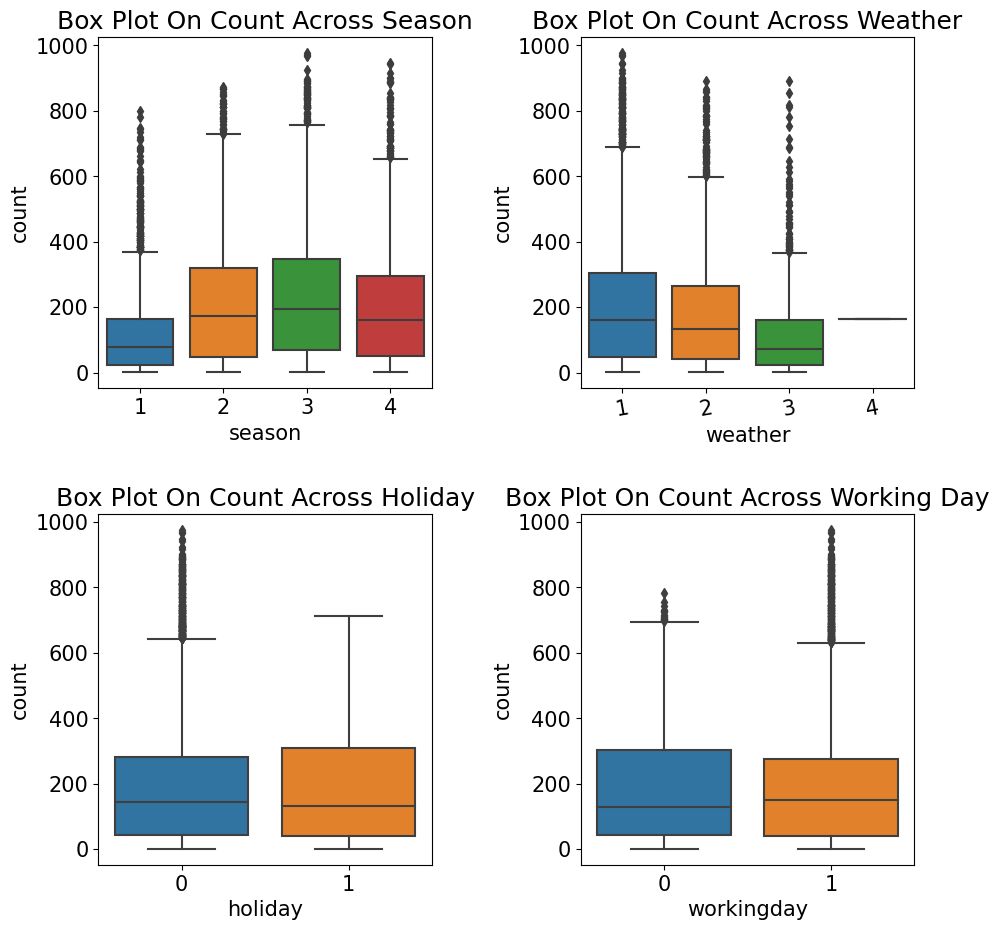

In [12]:
#막대 그래프 

# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(10, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 x축 라벨 겹침 해결
axes[0, 1].tick_params(axis='x', labelrotation=10) # 10도 회전

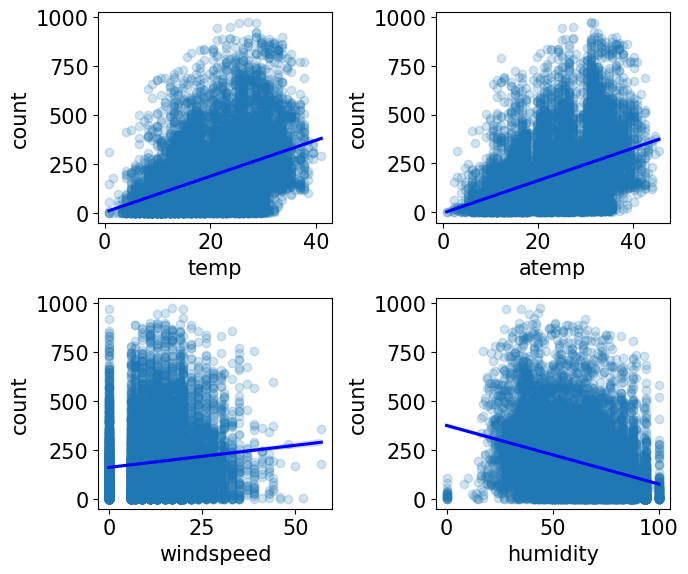

In [13]:
#산점도 그래프 

# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1],
           scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});


In [14]:
# all_data['year'] = pd.to_numeric(all_data['year'], errors='coerce')
# all_data['hour'] = pd.to_numeric(all_data['hour'], errors='coerce')

### 이상치 제거

In [15]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

### 데이터 합치기

In [16]:
all_data = pd.concat([train, test], ignore_index=True)
all_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


### 파생 변수(피처) 추가

In [17]:
from datetime import datetime

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

In [18]:
# all_data['peak'] = all_data[['hour', 'workingday']]\
#     .apply(lambda x: 1 if ((x['workingday'] == 1 and (x['hour'] == 8 or 17 <= x['hour'] <= 18)) \
#                             or (x['workingday'] == 0 and 10 <= x['hour'] <= 19)) else 0, axis=1)
all_data['hurricanesandy'] = all_data.apply(lambda df: 1 if ((df['workingday'] == 1 and (df['hour'] == 8 or 17 <= int(df['hour']) <= 18))
                                                    or (df['workingday'] == 0 and 10 <= int(df['hour']) <= 19)) else 0, axis=1)
#sandy
all_data['holiday'] = all_data.apply(lambda df: 1 if (df['year'] == 2012 and df['month'] == 10 and df['day'] == 30) else df['holiday'], axis=1)
# 휴일 조정
all_data['holiday'] = all_data.apply(lambda df: 1 if (df['month'] == 12 and df['day'] in [24, 26, 31]) else df['holiday'], axis=1)
# 근무일 조정
all_data['workingday'] = all_data.apply(lambda df: 0 if df['month'] == 12 and df['day'] in [24, 31] else df['workingday'], axis=1)
all_data['ideal'] = all_data.apply(lambda df: 1 if (df['temp'] > 27 and df['windspeed'] < 30) else 0, axis=1)
all_data['sticky'] = all_data.apply(lambda df: 1 if (df['workingday'] == 1 and df['humidity'] >= 60) else 0, axis=1)


### 필요 없는 피처 제거

In [19]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

In [20]:
all_data.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,count,year,hour,weekday,hurricanesandy,ideal,sticky
6479,1,0,1,1,11.48,12.880,61,108.0,2012,06,2,0,0,1
14498,1,0,1,2,15.58,19.695,76,NaN,2012,08,4,0,0,1
15174,2,0,1,2,19.68,23.485,51,NaN,2012,13,0,0,0,0
9365,3,0,1,1,29.52,32.575,42,352.0,2012,15,3,0,1,0
3383,3,0,1,1,31.16,33.335,33,209.0,2011,21,2,0,1,0
7589,2,0,1,2,28.70,32.575,61,256.0,2012,15,1,0,1,1
4889,4,0,1,3,18.86,22.725,88,111.0,2011,19,2,0,0,1
755,1,0,1,1,14.76,15.910,46,70.0,2011,20,0,0,0,0
634,1,0,1,2,8.20,9.090,34,64.0,2011,15,2,0,0,0
12804,3,0,1,1,25.42,31.060,41,NaN,2011,23,0,0,0,0


In [21]:
all_data['year'] = all_data['year'].astype('category').cat.codes
all_data['hour'] = all_data['hour'].astype('category').cat.codes

### 데이터 나누기

In [22]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])]
X_test = all_data[pd.isnull(all_data['count'])]

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1)
X_test = X_test.drop(['count'], axis=1)

y = train['count'] # 타깃값

## 평가지표 계산 함수 작성

In [23]:
import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)

    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))

    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

모델 훈련 및 성능 

In [24]:
    from sklearn.linear_model import LinearRegression,Ridge,Lasso
    from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
    from skopt import BayesSearchCV
    from skopt.space import Real, Categorical, Integer
    from sklearn import metrics

    ridge_model = Ridge()

릿지회귀

모델 생성

In [25]:
# # 하이퍼 파라미터 값 목록
# ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}

# # 교차 검증용 평가 함수(RMSLE 점수 계산)
# rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
# # 그리드서치(with 릿지) 객체 생성
# gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델
#                                       param_grid=ridge_params, # 값 목록
#                                       scoring=rmsle_scorer,    # 평가지표
#                                       cv=5)                    # 교차검증 분할 수

In [26]:
ridge_params = {'max_iter': [3000],'alpha': [0.01, 0.1, 1, 2, 3, 4, 10, 20, 30, 50, 100, 200, 300, 400, 500, 800, 900, 1000]}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

gridsearch_ridge_model = GridSearchCV(estimator=Ridge(),
                                      param_grid=ridge_params,
                                      scoring=rmsle_scorer,
                                      cv=5,
                                      n_jobs=-1)  # 병렬 처리를 위해 모든 사용 가능한 CPU 코어 사용


그리드서치 수행

In [27]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 2, 3, 4, 10, 20, 30, 50, 100,
                                   200, 300, 400, 500, 800, 900, 1000],
                         'max_iter': [3000]},
             scoring=make_scorer(rmsle, greater_is_better=False))

In [28]:
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 10, 'max_iter': 3000}


5.2 성능 검증

In [29]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train)

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

릿지 회귀 RMSLE 값 : 0.9649


# **라쏘 회귀**

In [30]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.001, 'max_iter': 3000}


In [31]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 0.9649


# 7. 성능 개선 III : 랜덤 포레스트 회귀 모델

## 7.1 하이퍼 파라미터 최적화(모델 훈련)

In [32]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


## 7.2 모델 성능 검증

In [33]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1115


그레디언트

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params = {'random_state':[42], 'max_depth':range(1,11,1),'n_estimators':[1,10,100]}
gridsearch_gb_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)

# 그리드서치 수행
log_y = np.log(y)
gridsearch_gb_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_gb_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


In [35]:
# 예측
preds = gridsearch_gb_model.best_estimator_.predict(X_train)

# 평가
print(f'그래디언트 부스팅 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

그래디언트 부스팅 RMSLE 값 : 0.1115


# 7. 성능 개선 IIII : knn

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# KNN 회귀 모델 생성
knn = KNeighborsRegressor()

# 그리드 서치를 위한 파라미터 그리드 설정
knn_params = {
    'n_neighbors': range(1, 11),  # 이웃의 수
    'weights': ['uniform', 'distance'],  # 가중치 함수
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # 알고리즘
    'leaf_size': range(10, 51, 10)  # 리프 사이즈
}

# 그리드 서치 객체 생성
gridsearch_knn_model = GridSearchCV(estimator=knn,
                                    param_grid=knn_params,
                                    scoring=rmsle_scorer,
                                    cv=5,
                                    n_jobs=-1)  # 병렬 처리

# 그리드 서치 수행
log_y = np.log1p(y)  # 타깃값 로그 변환
gridsearch_knn_model.fit(X_train, log_y)

# 최적 하이퍼파라미터 출력
print('최적 하이퍼파라미터 :', gridsearch_knn_model.best_params_)

최적 하이퍼파라미터 : {'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 7, 'weights': 'distance'}


In [37]:
# 예측
preds = gridsearch_knn_model.best_estimator_.predict(X_train)

# 평가
print(f'KNN RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

KNN RMSLE 값 : 0.0178


XGBRegressor

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

xgb_model = XGBRegressor(enable_categorical=True)

# 그리드 서치를 위한 파라미터 그리드 설정
xgb_params = {
    'random_state': [42],
    'max_depth': range(1, 11, 1),  # 깊이
    'n_estimators': [1, 10, 100],  # 트리의 개수
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률 추가
    'subsample': [0.7, 0.8, 1.0],  # 트리 당 데이터 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 1.0],  # 각 트리마다의 피처 샘플링 비율
    'gamma': [0.1],
    'min_child_weight': [5]
}

# 그리드 서치 객체 생성
gridsearch_xgb_model = GridSearchCV(estimator=xgb_model,
                                    param_grid=xgb_params,
                                    scoring=rmsle_scorer,
                                    cv=5,
                                    n_jobs=-1)  # 병렬 처리

# 그리드 서치 수행
log_y = np.log(y)
gridsearch_xgb_model.fit(X_train, log_y)

# 최적 하이퍼파라미터 출력
print('최적 하이퍼파라미터 :', gridsearch_xgb_model.best_params_)

최적 하이퍼파라미터 : {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'random_state': 42, 'subsample': 1.0}


In [39]:
# 예측
preds = gridsearch_xgb_model.best_estimator_.predict(X_train)

# 평가
print(f'xgb RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

xgb RMSLE 값 : 0.2702


얼리스탑

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_log_error

# 데이터를 훈련 데이터와 검증 데이터로 분할
X_train, X_val, y_train, y_val = train_test_split(X_train, log_y, test_size=0.2, random_state=42)

# XGBRegressor 모델 생성
xgb_model2 = XGBRegressor(enable_categorical=True,
                          random_state=42,
                          n_estimators=10,
                          learning_rate=0.2,
                          max_depth=5,
                          subsample=1.0,
                          colsample_bytree=0.7,
                          gamma=0.1,
                          min_child_weight=5)

# 모델 학습 (얼리 스탑)
xgb_model2.fit(X_train, y_train,
               eval_set=[(X_val, y_val)],
               early_stopping_rounds=50,
               eval_metric="rmse",
               verbose=True)

# 검증 데이터에 대한 예측
predictions = xgb_model2.predict(X_val)

# 성능 평가
rmsle = np.sqrt(mean_squared_log_error(np.exp(y_val), np.exp(predictions)))
print(f"얼리스탑 XGB RMSLE: {rmsle:.4f}")

[0]	validation_0-rmse:1.26583
[1]	validation_0-rmse:1.17896
[2]	validation_0-rmse:1.00191
[3]	validation_0-rmse:0.86927
[4]	validation_0-rmse:0.82365
[5]	validation_0-rmse:0.72066
[6]	validation_0-rmse:0.69808
[7]	validation_0-rmse:0.63343
[8]	validation_0-rmse:0.57891
[9]	validation_0-rmse:0.56316
얼리스탑 XGB RMSLE: 0.5178


랜덤서치

In [41]:
# # 하이퍼파라미터 탐색 공간 설정
# param_distributions = {
#     'random_state': [42],
#     'max_depth': range(1, 11, 1),  # 깊이
#     'n_estimators': [1, 10, 100],  # 트리의 개수
#     'learning_rate': [0.01, 0.1, 0.2],  # 학습률 추가
#     'subsample': [0.7, 0.8, 1.0],  # 트리 당 데이터 샘플링 비율
#     'colsample_bytree': [0.7, 0.8, 1.0],  # 각 트리마다의 피처 샘플링 비율
#     'gamma': [0, 0.1, 0.2],
#     'min_child_weight': [1, 5, 10]
# }


# # 랜덤 서치 객체 생성
# random_search = RandomizedSearchCV(
#     estimator=XGBRegressor(random_state=42, enable_categorical=True),
#     param_distributions=param_distributions,
#     n_iter=50,  # 시도할 조합의 수
#     scoring='neg_mean_squared_error',
#     cv=5,
#     n_jobs=-1,
#     random_state=42
# )

# # 최적화 실행
# log_y = np.log(y)
# random_search.fit(X_train, log_y)

# # 최적 파라미터 출력
# print("Best parameters found: ", random_search.best_params_)

## 7.3 예측 및 결과 제출

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


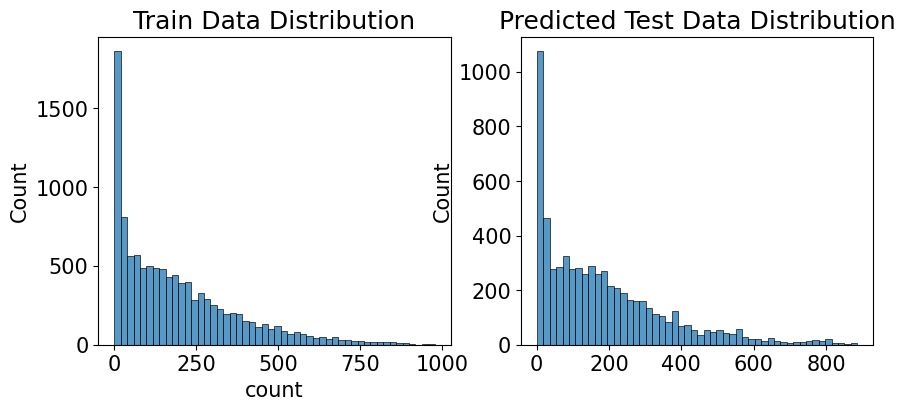

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

#xgb_preds = xgb_model2.best_estimator_.predict(X_test)
xgb_preds = gridsearch_xgb_model.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(xgb_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

In [47]:
submission['count'] = np.exp(xgb_preds) # 지수변환
submission.to_csv('submission.csv', index=False)

# 실습 과제: 개선시도 3가지, 0.39567 보다 낮은 score 달성
아래의 3가지를 모두 개선 시도하여 0.39567 보다 낮은 score를 달성하시오. 과제로 제공한 코드를 기반으로 다른 캐글 코드의 일부 내용을 참고하여 수정하는 것은 허용합니다.

* 1) 피처 엔지니어링
* 2) 모델 선택
* 3) 하이퍼파라미터 최적화

성능 개선 시도한 내용 간략히 작성해주세요.
* 1) 피처 엔지니어링: 수행한 내용 작성
1. peak 피처 추가 (시간이 피크시간인지 아닌지 나타냄 근무일 휴무일에 따라 다름)
2. hurricanesandy 피처 추가 (태풍)
3. holiday (크리스마스 같은 휴일 표시)
4. workingday 피처추가 (12월 24일과 31일의 근무일 상태를 휴무일로 조정)
5. ideal 피처추가 (운도와 풍속 기반 날씨가 좋은 날씨)
6. sticky 피처추가 (습도가 높은 날)
7. 각 계절에 잘못된  들어가 있는게 있어서 수정
8. XGBoost를 사용할려 했으니 모든 입력이 수치형이야 하는데 year, hour의 문제로 시행이 안됨
-> 숫자 레이블 인코딩으로 피처를 범주형으로 변환한 후, 각 범주를 고유한 정수로 변환과정 시행


* 2) 모델 선택: 수행한 내용 작성
1. KNN로 시행시 RMSLE 값은 낮게 나오나 스코어 값은 높게나옴
2. xgb모델 얼리스탑 시행시 RMSLE값이 오히려 높게나옴
2. xgb모델 기본 모델로 수행


* 3) 하이퍼파라미터 최적화: 수행한 내용 작성
1. 하이퍼파라미티 탐색공간 내용 수정
    'max_depth': range(1, 11, 1),  # 깊이
    
    'n_estimators': [1, 10, 100],  # 트리의 개수
    
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률 추가
    
    'subsample': [0.7, 0.8, 1.0],  # 트리 당 데이터 샘플링 비율
    
    'colsample_bytree': [0.7, 0.8, 1.0]  # 각 트리마다의 피처 샘플링 비율
    
    'gamma': [0.1],#최소 손실 감소량 지정
    
    'min_child_weight': [5]#최소 자식 가중치 설정
    
    감마와 최소 자식 가중치는 샐플링시 너무 오래걸려서 임의의 숫자를 넣고 수행
2. 랜덤서치로 시도 해봤는 X_train과 y 자료 갯수가 달라 실패 
    



0.39567 보다 낮은 score 달성한 성능 증빙자료는 과제함에 제출해주세요.